# Step One
* Identify variables and data types
* Analyse basic metrics
* Non-graphical univariate analysis
* Graphical univariate analysis
* Bivariate analysis

## Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np

# Import data - using the Kaggle House Price competition training set for this example

data = pd.read_csv('Kaggle_Houseprices_train.csv')

## Identify variables and data types

In [2]:
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Use qgrid to show lika a spreadsheet - https://github.com/quantopian/qgrid
import qgrid
qgrid_widget = qgrid.show_grid(data,
                               show_toolbar=True,
                              grid_options={'forceFitColumns': False}  #   Many columns in dataframe become unusable for filter without this
                              )
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [5]:
# Remember to re-run this cell after each change in filter above
# This displays the filtered data from the dataframe above
qgrid_widget.get_changed_df()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# data.dtypes   # Only displays top and bottom, see next code box for improved function

In [7]:
data.info(verbose=True)   # df.dtype only displays top and bottom, this displays all data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.describe()   # Excluded NaN

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Number of unique records

unique_records = data.from_records([(col, data[col].nunique()) for col in data.columns],columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
qgrid_widget2 = qgrid.show_grid(unique_records, show_toolbar=True)
qgrid_widget2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

<AxesSubplot:>

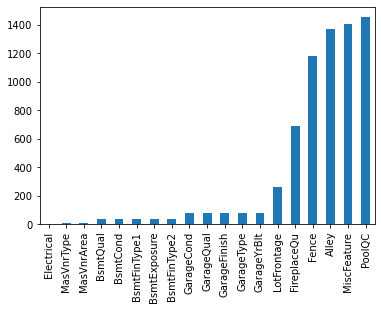

In [170]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()  #   Height of bar shown number of rows with missing data

In [11]:
# qgrid exploration of missing data
missing_df = missing.to_frame()
qgrid_widget3 = qgrid.show_grid(missing_df, show_toolbar=True)
qgrid_widget3

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Graphical univariate analysis

In [12]:
# import plotting and analysis libraries
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

### Distributions

### Histograms

In [13]:
# List all numerical variables
numerical_variables = data.select_dtypes(exclude=['object'])
numerical_variables.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

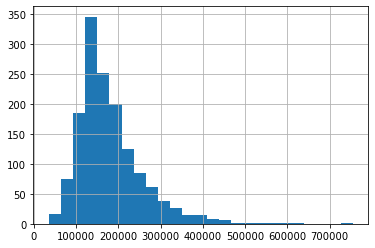

In [14]:
data['SalePrice'].hist(bins=25)  #   Can manually play by plotting the numerical variables in previous cell

<Figure size 432x288 with 0 Axes>

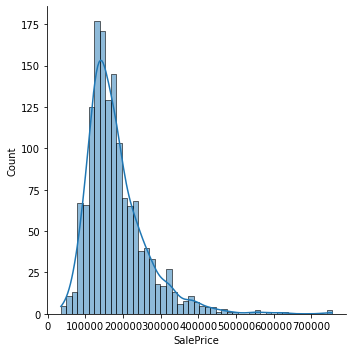

In [15]:
plt.figure(1)  #  Create a new figure, numbered / reference = 1
#   Same as above, make histogram, but use seaborn and fit a distribution.  KDE = kernel density estimator
sns.displot(data['SalePrice'], kde=True)  #  Easiest is to select and copy feature name above, select and paste here

> What we want to know is whether a variable is normally distributed
> in order to decide whether it needs to be transformed before
> fitting a standard regressor.  Now using the same exploratory plot
> with normal curve fitted

/Users/swbza/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

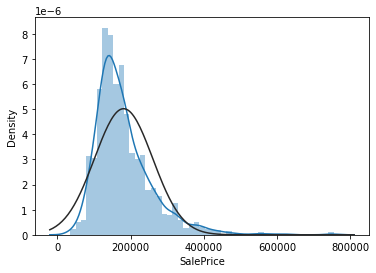

In [16]:
plt.figure(2)  #  Create a new figure, numbered / reference = 1
#   Same as above, make histogram, but use seaborn and fit a distribution.  This time use histplot, not displot
sns.distplot(data['SalePrice'], fit=st.norm, kde=True)  #  Easiest is to select and copy feature name above, select and paste here

### Box plots

AxesSubplot(0.125,0.125;0.775x0.755)


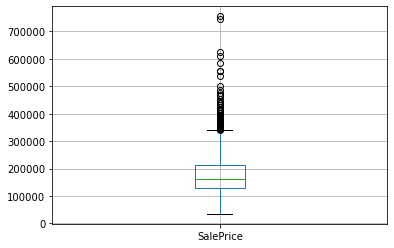

In [17]:
print(data.boxplot(column='SalePrice'))  #   Standard Pandas

<AxesSubplot:xlabel='SalePrice'>

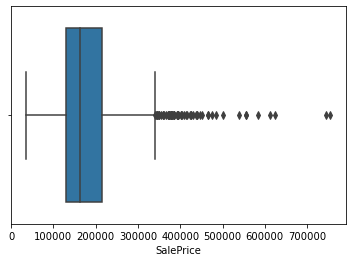

In [18]:
sns.boxplot(x=data['SalePrice'])

### Count plots - categorical features

In [19]:
# List all categorical variables
categorical_variables = data.select_dtypes(include=['object'])
categorical_variables.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

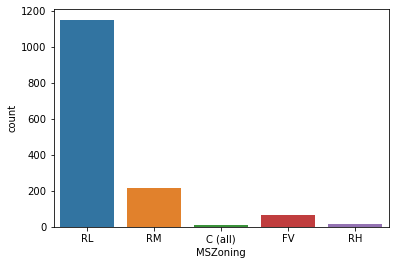

In [20]:
sns.countplot(x=data['MSZoning'])  #   Use for categorical variables

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

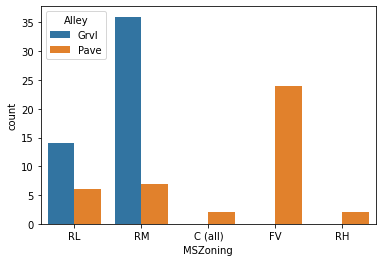

In [21]:
# Now do the same and see a different variable on the same plot using colour

sns.countplot(x=data['MSZoning'], hue=data['Alley'])

## Bivariate analysis - categorical features

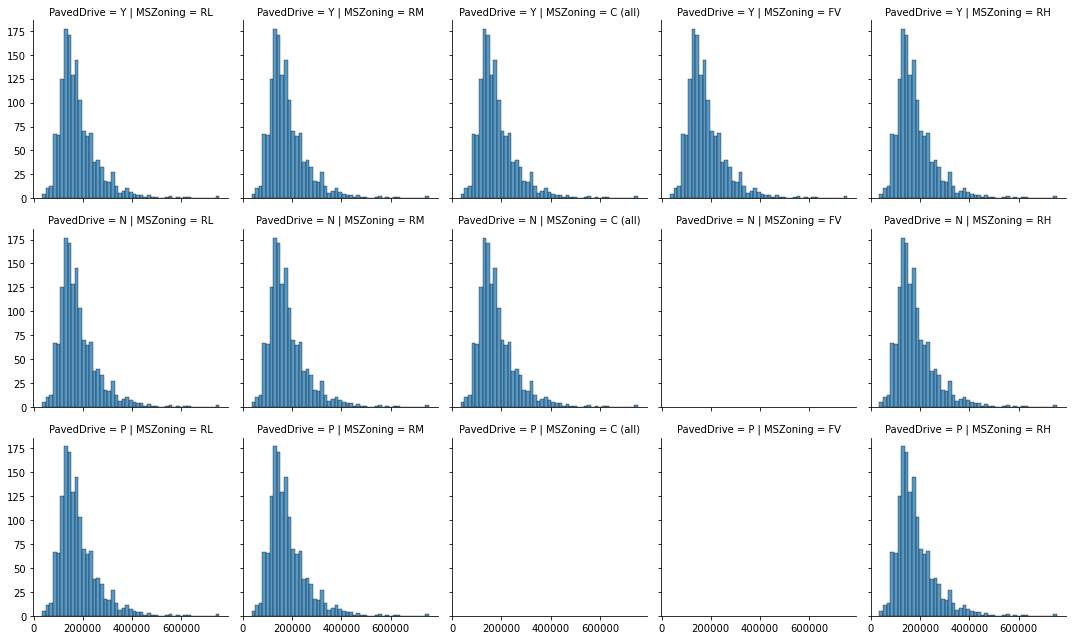

In [22]:
# This is a useful way of mapping a numerical variable against sets of **categorical** features

g = sns.FacetGrid(data, col='MSZoning', row='PavedDrive')  #   This draws the set of axes
g.map_dataframe(sns.histplot, x=data['SalePrice'])  #   This plots a function on each figure.  Try histplot, boxplot

### Box plots

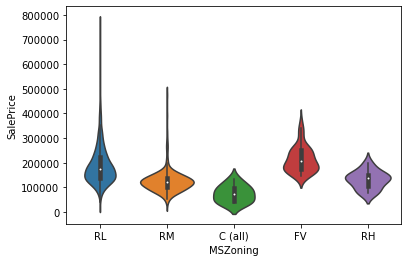

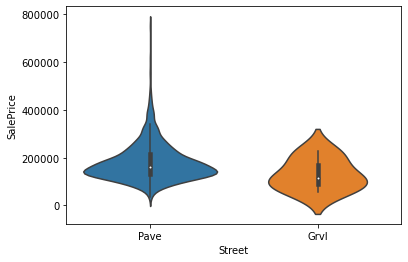

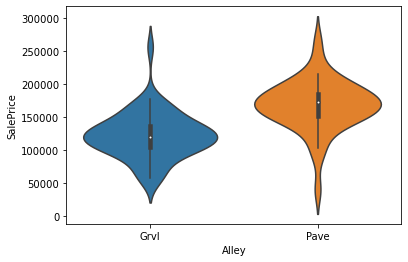

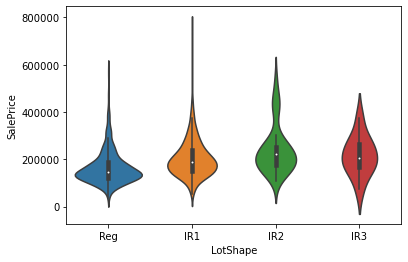

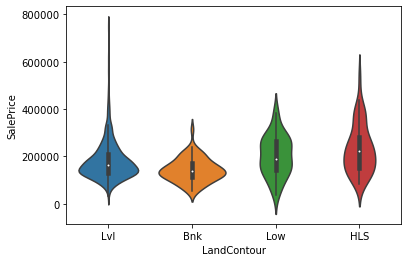

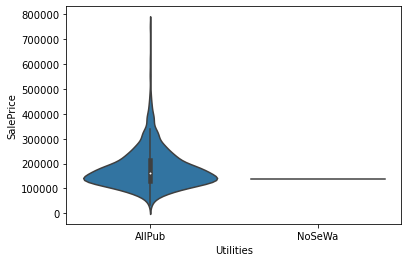

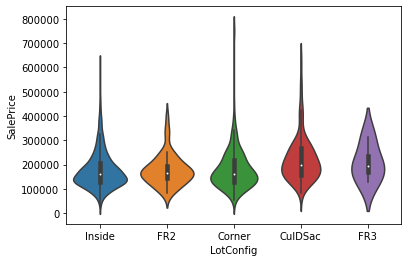

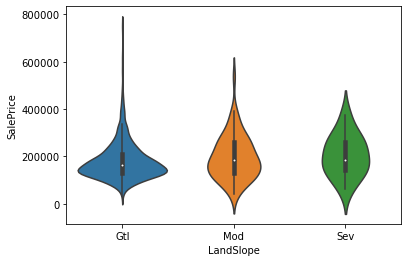

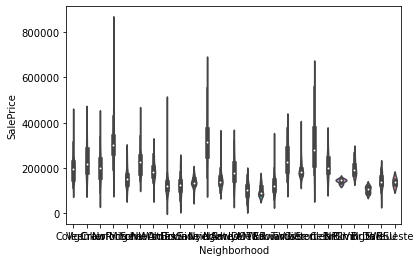

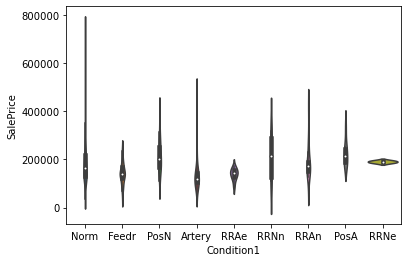

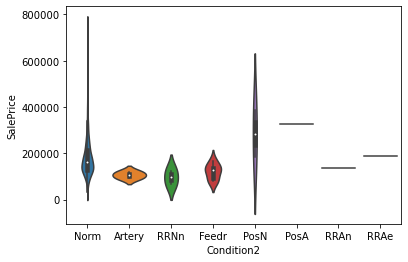

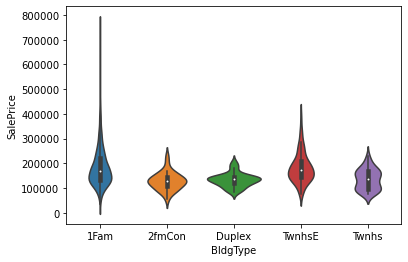

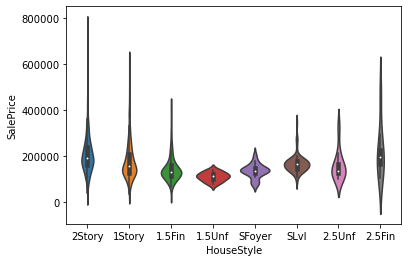

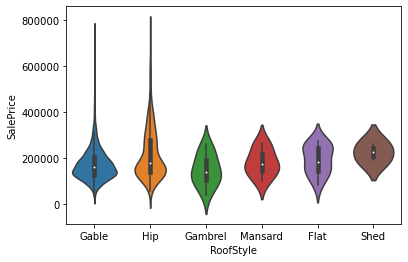

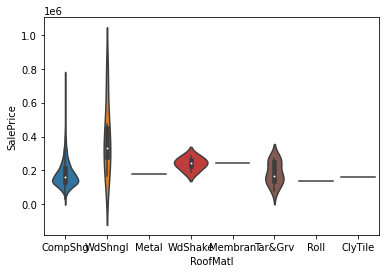

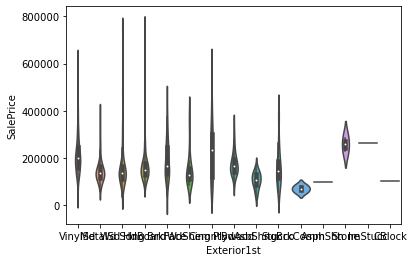

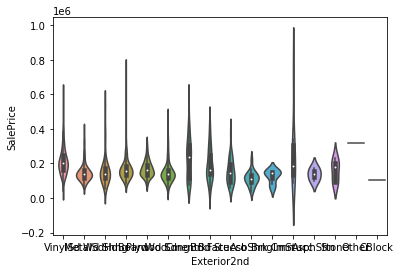

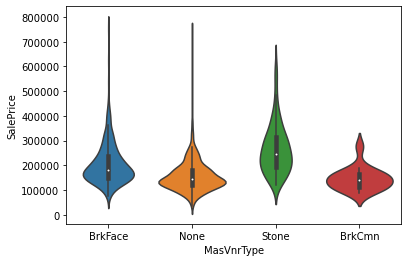

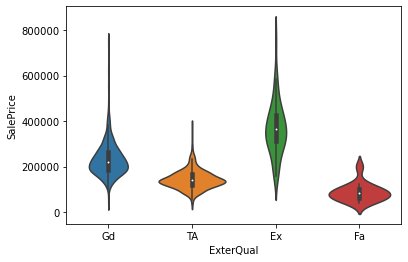

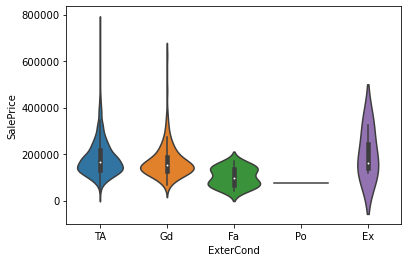

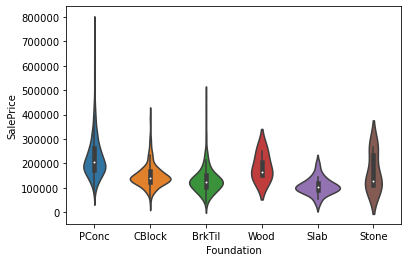

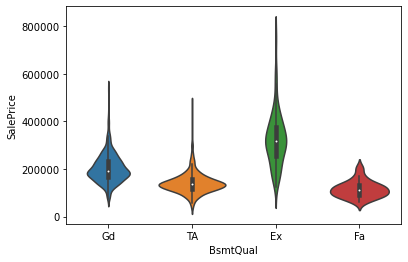

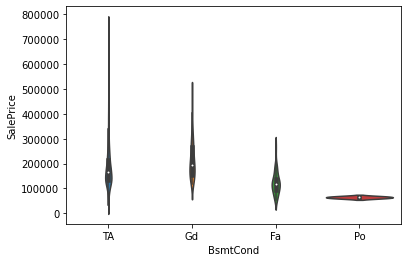

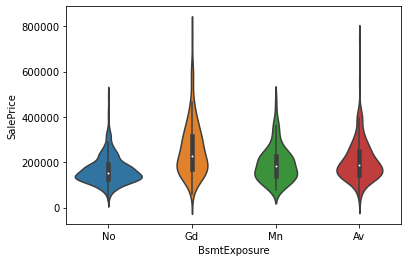

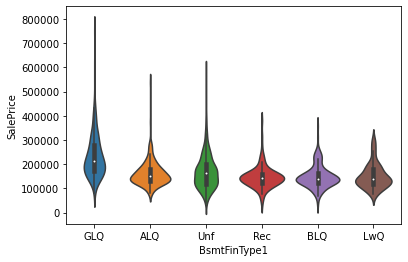

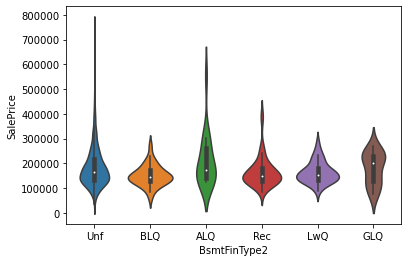

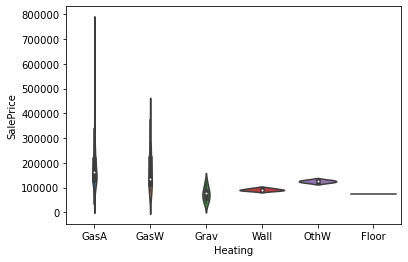

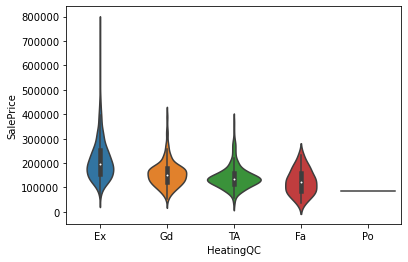

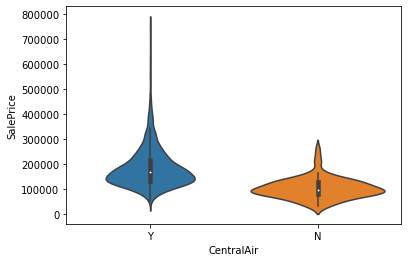

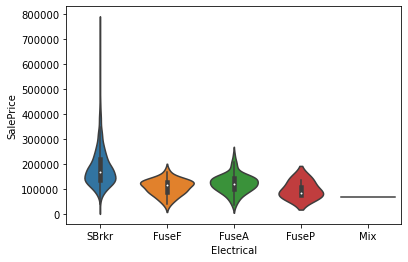

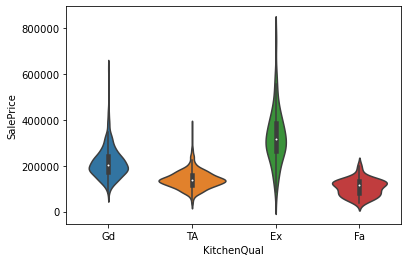

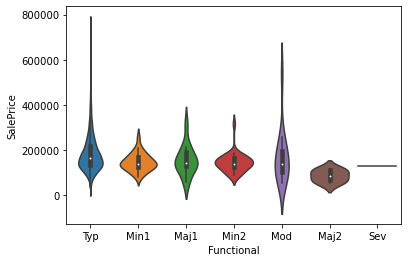

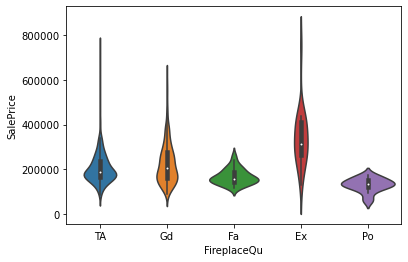

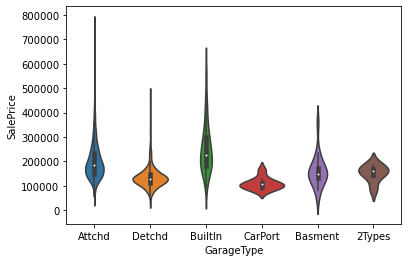

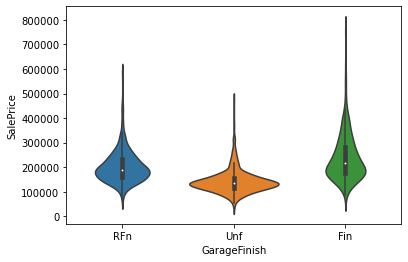

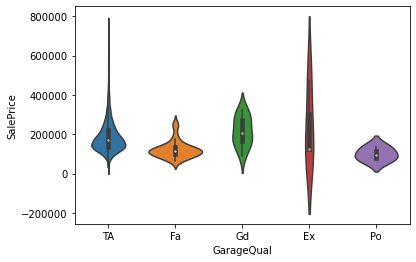

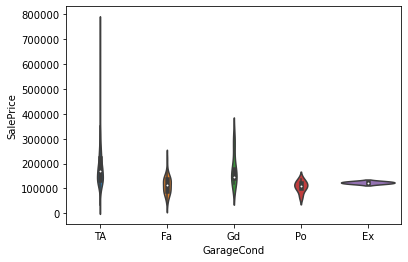

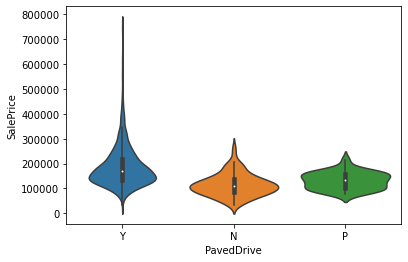

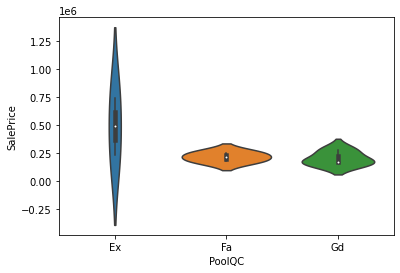

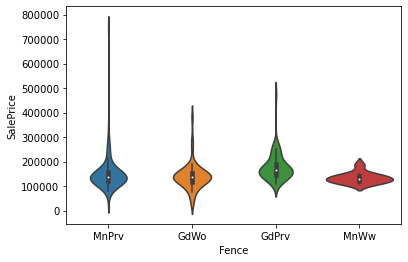

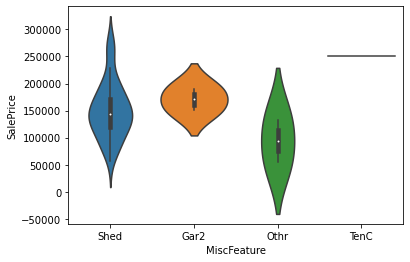

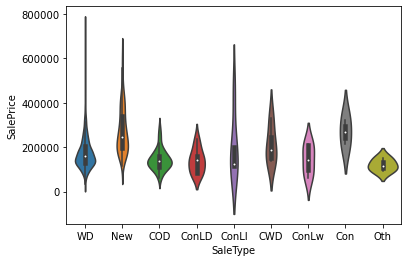

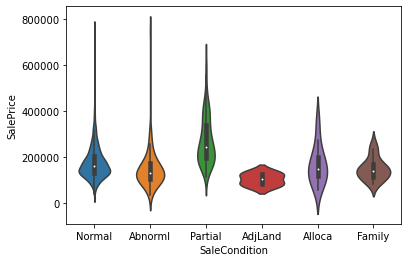

In [159]:
# See variation in SalePrice for each categorical variable

for c in categorical_variables:
    sns.violinplot(x=data[c], y=data['SalePrice'])  #   Try violinplot, boxplot
    plt.show()

### ANOVA for influence of categorical values on dependent variabld

/Users/swbza/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


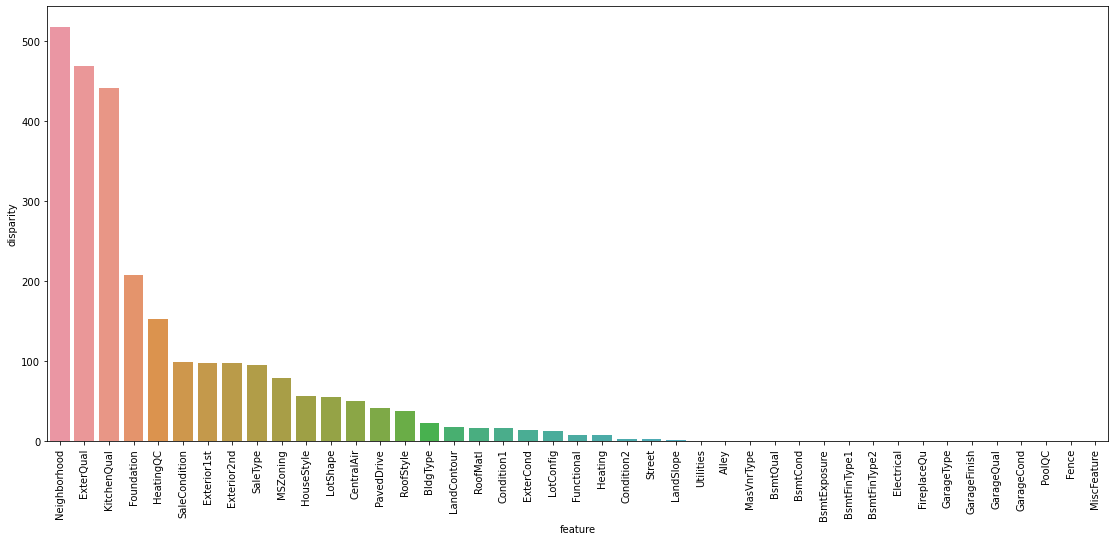

In [151]:
# Check rough influence of categorical variable on SalePrice
# Note: already imported scipy.stats as st

qualitative = [f for f in data.columns if data.dtypes[f] == 'object']  #   This is a list

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(data)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(19,8))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

#### Correlations for numerical features

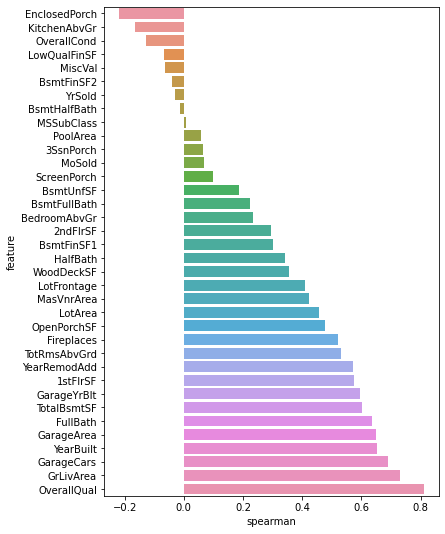

In [156]:
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')

def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative  #   This excludes categorical features.
spearman(data, features)

'''
Read up on Spearman correlation.  Also, the Kaggle guy did encoding of the categorical features that I don't understand.
https://www.kaggle.com/dgawlik/house-prices-eda
'''